### Linear Regression

In [41]:
!pip install pandas
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [43]:
df = pd.read_csv('Student_Performance.csv')

In [45]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [47]:
# Check duplicates
print(df.duplicated().sum())


127


In [48]:
df=df.drop_duplicates()  # Remove duplicates if any

In [49]:
# Check duplicates
print(df.duplicated().sum())

0


In [33]:
# Check for null values
print(df.isnull().sum())

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [50]:
df.count()

Hours Studied                       9873
Previous Scores                     9873
Extracurricular Activities          9873
Sleep Hours                         9873
Sample Question Papers Practiced    9873
Performance Index                   9873
dtype: int64

In [51]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [52]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [53]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [ ]:
df.rename(columns={'Hours_Studied':'Hours_Studied', 'Previous Score':'Prev_Score', 'Extracurricular Activities':'Extracurricular_Activities', 'Sample Question Papers Practiced':'Sample_Question Papers_Practiced', 'Performance Index':'Performance_Index'}, inplace=True)

In [55]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular_Activities',
       'Sleep Hours', 'Sample_Question Papers_Practiced', 'Performance_Index'],
      dtype='object')

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Extracurricular_Activities'] = le.fit_transform(df['Extracurricular_Activities'])
df.head()

,Hours Studied,Previous Scores,Extracurricular_Activities,Sleep Hours,Sample_Question Papers_Practiced,Performance_Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


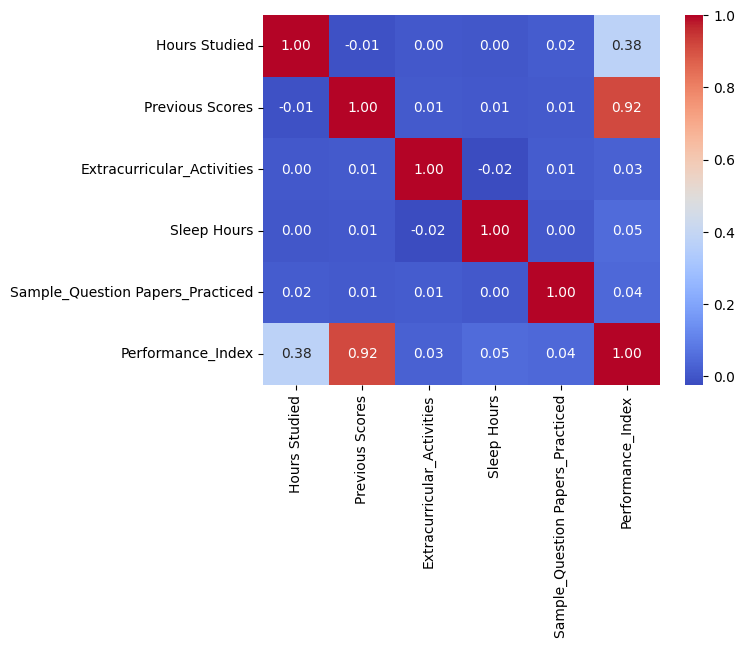

In [57]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', fmt=".2f")
plt.show()

In [59]:
X= df['Previous Scores']
Y= df['Performance_Index']

In [60]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size= 0.25)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lr = LinearRegression()

In [66]:
lr.fit(X_train.values.reshape(-1,1), Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
Y_pred = lr.predict(X_test.values.reshape(-1,1))

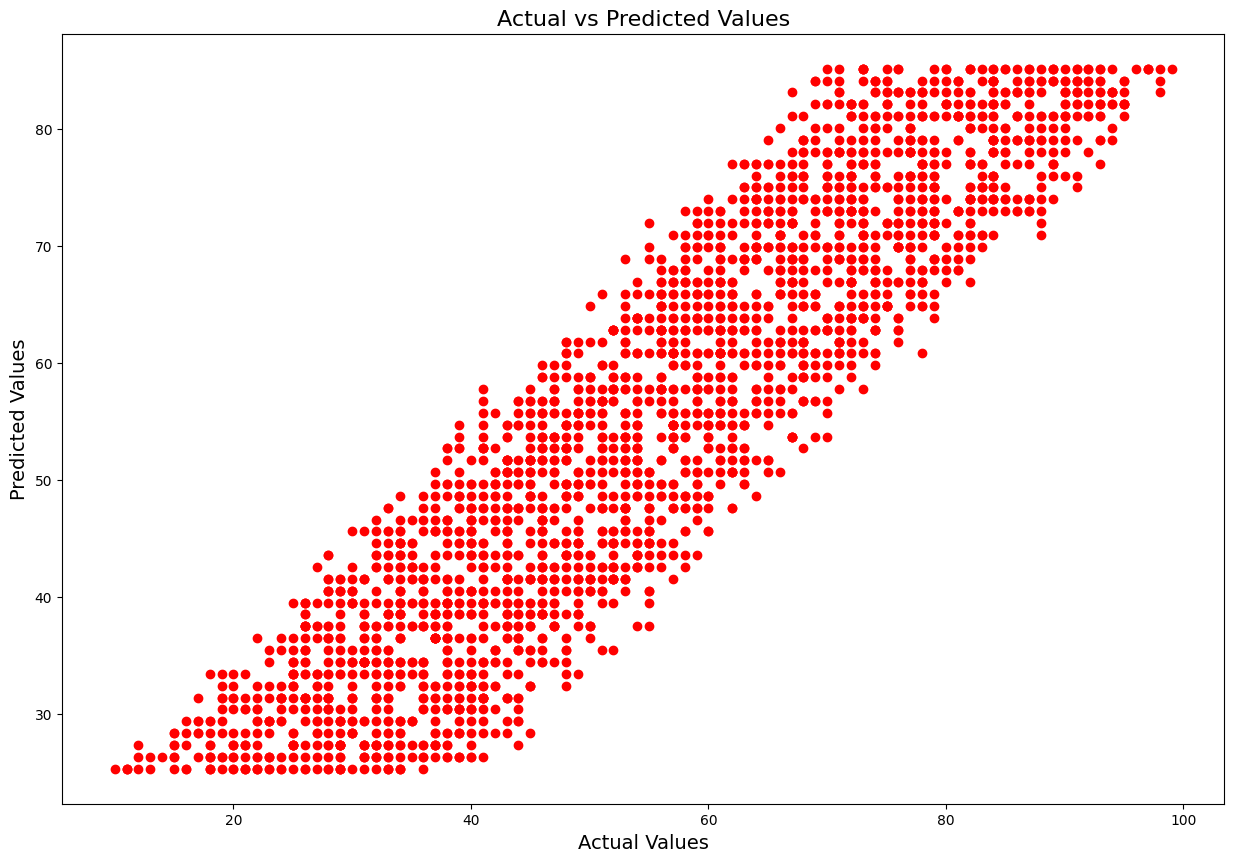

In [76]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test, Y_pred, color='Red')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs Predicted Values', fontsize=16)
plt.show()